In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# Multivariate regression
 - price = m1.area + m2.bedrooms + m3.age + b
 - m1, m2, m3 are the coefficients and b is the intercept
 - area, bedrooms, age are the features (independent variables)
 - price is the target variable (dependent variable)

In [44]:
df = pd.read_csv("homeprices.csv")

In [45]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


## Data processing to handle NAN values

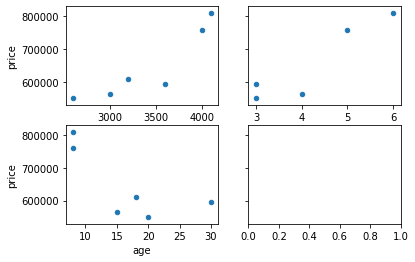

In [46]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)
df.plot('area', 'price', kind='scatter', ax=axes[0,0])
df.plot('bedrooms', 'price', kind='scatter', ax=axes[0,1])
df.plot('age', 'price', kind='scatter', ax=axes[1,0])


### The number of bedrooms is missing for one entry, you can take median of all other entries and fill with this value

In [47]:
import math
median_bedrooms = math.floor(df.bedrooms.mean())
median_bedrooms

4

In [48]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Now training the model

In [49]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [51]:
reg.intercept_

221323.00186540408

In [52]:
reg.predict([[3000, 3, 40]])

array([498408.25158031])

In [53]:
reg.predict([[2500, 4, 5]])

array([578876.03748933])